In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('C:/Users/chamo/Documents/plynomial regresion.csv')

In [3]:
df

,Commodity Name,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,...,Color,Environment,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode
0,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
1,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
2,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
3,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,09/24/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
4,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
5,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
6,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,150.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
7,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/01/2016,150.0,150.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
8,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,140.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN
9,PUMPKINS,ATLANTA,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,10/08/2016,145.0,154.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN


In [4]:
cat_map = {
    'sml': 0,
    'med': 1,
    'med-lge': 2,
    'lge': 3,
    'xlge': 4,
    'exjbo': 5
}
df = df.assign(
    size=df['Item Size'].map(cat_map),
    price=df['High Price'] + df['Low Price'] / 2,
    size_class=(df['Item Size'].map(cat_map) >= 2).astype(int)
)
df =df.drop([c for c in df.columns if c not in ['size', 'price', 'size_class']], 
                                 axis='columns')
df=df.dropna()

In [5]:
df.head()

,size,price,size_class
1,4.0,227.25,1
2,2.0,229.75,1
3,0.0,225.00,0
5,4.0,227.25,1
6,2.0,229.75,1


In [6]:
prices =df.values[:, 1:2]
sizes = df.values[:, :1]

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree=2)
prices_poly = poly.fit_transform(prices)

clf = LinearRegression()
clf.fit(prices_poly, sizes)
predicted_sizes = np.round(clf.predict(prices_poly))

In [8]:
predicted_sizes

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-0.],
       [-0.],
       [-0.],
       [-0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

<AxesSubplot:title={'center':'$y - \\hat{y}$'}>

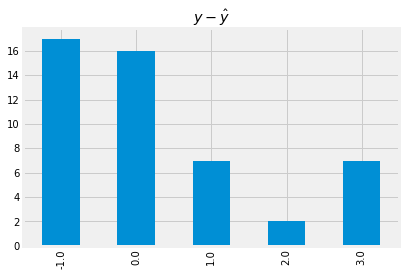

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

pd.Series((sizes - predicted_sizes).flatten()).value_counts().sort_index().plot.bar(
    title='$y - \hat{y}$'
)

<AxesSubplot:title={'center':'Accuracy Within 1 Class'}>

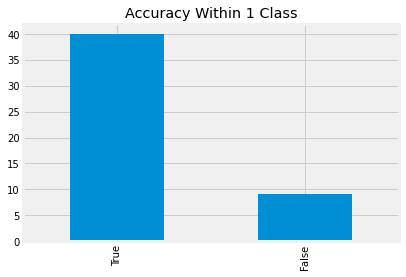

In [10]:
pd.Series(
    np.abs((sizes - predicted_sizes).flatten()) <= 1
).value_counts().plot.bar(title='Accuracy Within 1 Class')